# Import Required Libraries

In [1]:
# Data handling
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Preprocessing & splitting
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.impute import SimpleImputer
from sklearn.utils import resample

# Evaluation metrics
from sklearn.metrics import (accuracy_score,precision_score,recall_score,f1_score,
    classification_report,confusion_matrix,auc,roc_auc_score, roc_curve
)

# Regression Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

# XGBoost
from xgboost import XGBClassifier

# Warnings
import warnings
warnings.filterwarnings("ignore")

# Save the model
import joblib

# Load Dataset

In [2]:
data = pd.read_csv('Loan_default.csv')

# First 5 Rows
data.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


# EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

# Splitting for 2000 data sample

In [4]:
sample_data = data.sample(n=2000, random_state=42)

print("Original dataset shape:", data.shape)
print("Sampled dataset shape:", sample_data.shape)

Original dataset shape: (255347, 18)
Sampled dataset shape: (2000, 18)


# Swape Variable

In [5]:
data = sample_data

In [7]:
data.shape

(2000, 18)

# Duplicate Rows

In [8]:
duplicate_rows = data[data.duplicated()]
print("\nNumber of duplicate rows:", duplicate_rows.shape[0])


Number of duplicate rows: 0


# Remove ID columns

In [9]:
data.drop('LoanID',axis=1,inplace=True)
data.head(2)

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
51139,55,112656,92393,581,113,2,23.54,36,0.15,PhD,Self-employed,Single,Yes,Yes,Home,No,0
71005,56,91569,131575,641,54,1,15.19,12,0.43,High School,Part-time,Divorced,Yes,Yes,Education,Yes,0


# Checking for object number of unique

In [10]:
cat = data.select_dtypes(include='object')
for i in cat.columns:
    print(f"{i}")
    print(f"{cat[i].nunique()}")

Education
4
EmploymentType
4
MaritalStatus
3
HasMortgage
2
HasDependents
2
LoanPurpose
5
HasCoSigner
2


# Checking for object uniques

In [11]:
for i in cat.columns:
    print(f"{i}")
    print(f"{cat[i].unique()}")

Education
['PhD' 'High School' "Master's" "Bachelor's"]
EmploymentType
['Self-employed' 'Part-time' 'Unemployed' 'Full-time']
MaritalStatus
['Single' 'Divorced' 'Married']
HasMortgage
['Yes' 'No']
HasDependents
['Yes' 'No']
LoanPurpose
['Home' 'Education' 'Business' 'Other' 'Auto']
HasCoSigner
['No' 'Yes']


# Checking for balance or imbalance

In [12]:
Default_vc  = data["Default"].value_counts()
Default_vc

Default
0    1776
1     224
Name: count, dtype: int64

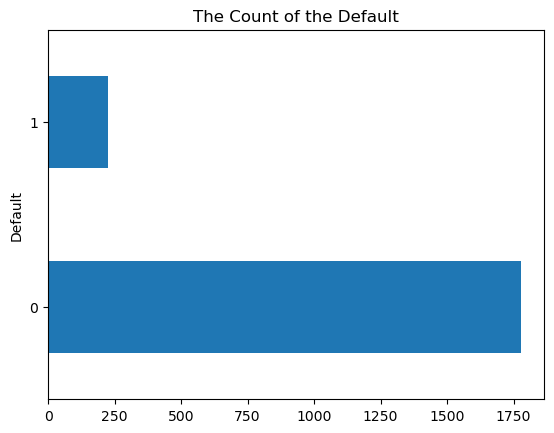

In [13]:
Default_vc.plot(kind='barh',title='The Count of the Default')
plt.show()

In [14]:
max_count = data['Default'].value_counts().max()
max_count

1776

In [15]:
upsampled_list = []

In [16]:
for cls in data['Default'].unique():
    cls_data = data[data['Default'] == cls]
    cls_upsampled = resample(
        cls_data,
        replace=True,
        n_samples=max_count,
        random_state=42
    )
    upsampled_list.append(cls_upsampled)

In [17]:
data_balanced = pd.concat(upsampled_list)

In [18]:
data_balanced = data_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

In [19]:
print("\nAfter balancing:")
print(data_balanced['Default'].value_counts())


After balancing:
Default
0    1776
1    1776
Name: count, dtype: int64


# Swape Variable

In [20]:
data = data_balanced

# Encoding

In [21]:
le = LabelEncoder()

for i in cat:
    data[i] = le.fit_transform(data[i])

data.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,37,80721,53281,332,89,3,21.52,60,0.70,0,0,2,1,0,3,0,0
1,62,114216,231133,375,11,3,21.97,60,0.78,1,0,2,0,0,0,0,0
2,21,35959,200465,310,1,3,23.76,48,0.47,3,0,2,1,1,3,0,1
3,28,21855,90123,329,108,1,22.85,12,0.89,3,2,0,1,1,0,0,0
4,63,76765,40142,645,104,1,16.50,60,0.47,2,2,2,0,1,1,0,0


# Scale

In [22]:
sc = StandardScaler()
data[['Income','LoanAmount']] = sc.fit_transform(data[['Income','LoanAmount']])

data.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,37,0.059579,-1.188191,332,89,3,21.52,60,0.70,0,0,2,1,0,3,0,0
1,62,0.909465,1.378078,375,11,3,21.97,60,0.78,1,0,2,0,0,0,0,0
2,21,-1.076191,0.935562,310,1,3,23.76,48,0.47,3,0,2,1,1,3,0,1
3,28,-1.434059,-0.656589,329,108,1,22.85,12,0.89,3,2,0,1,1,0,0,0
4,63,-0.040799,-1.377777,645,104,1,16.50,60,0.47,2,2,2,0,1,1,0,0


# Splitting for Target and Feature into Train Test Split

In [23]:
X = data.drop(['Default'],axis=1)
y = data['Default']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Target column balance 

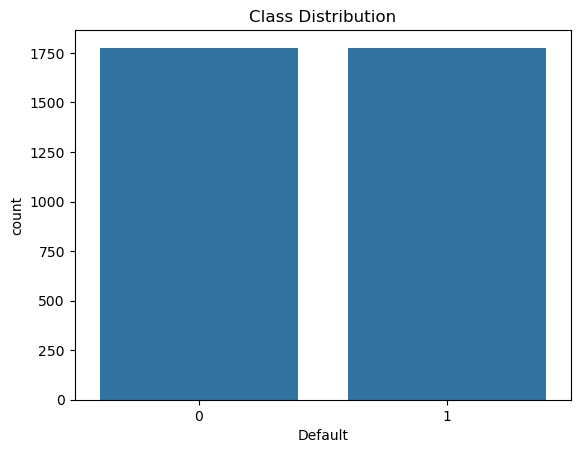

In [24]:
sns.countplot(x=y)
plt.title("Class Distribution")
plt.show();

# Heatmap

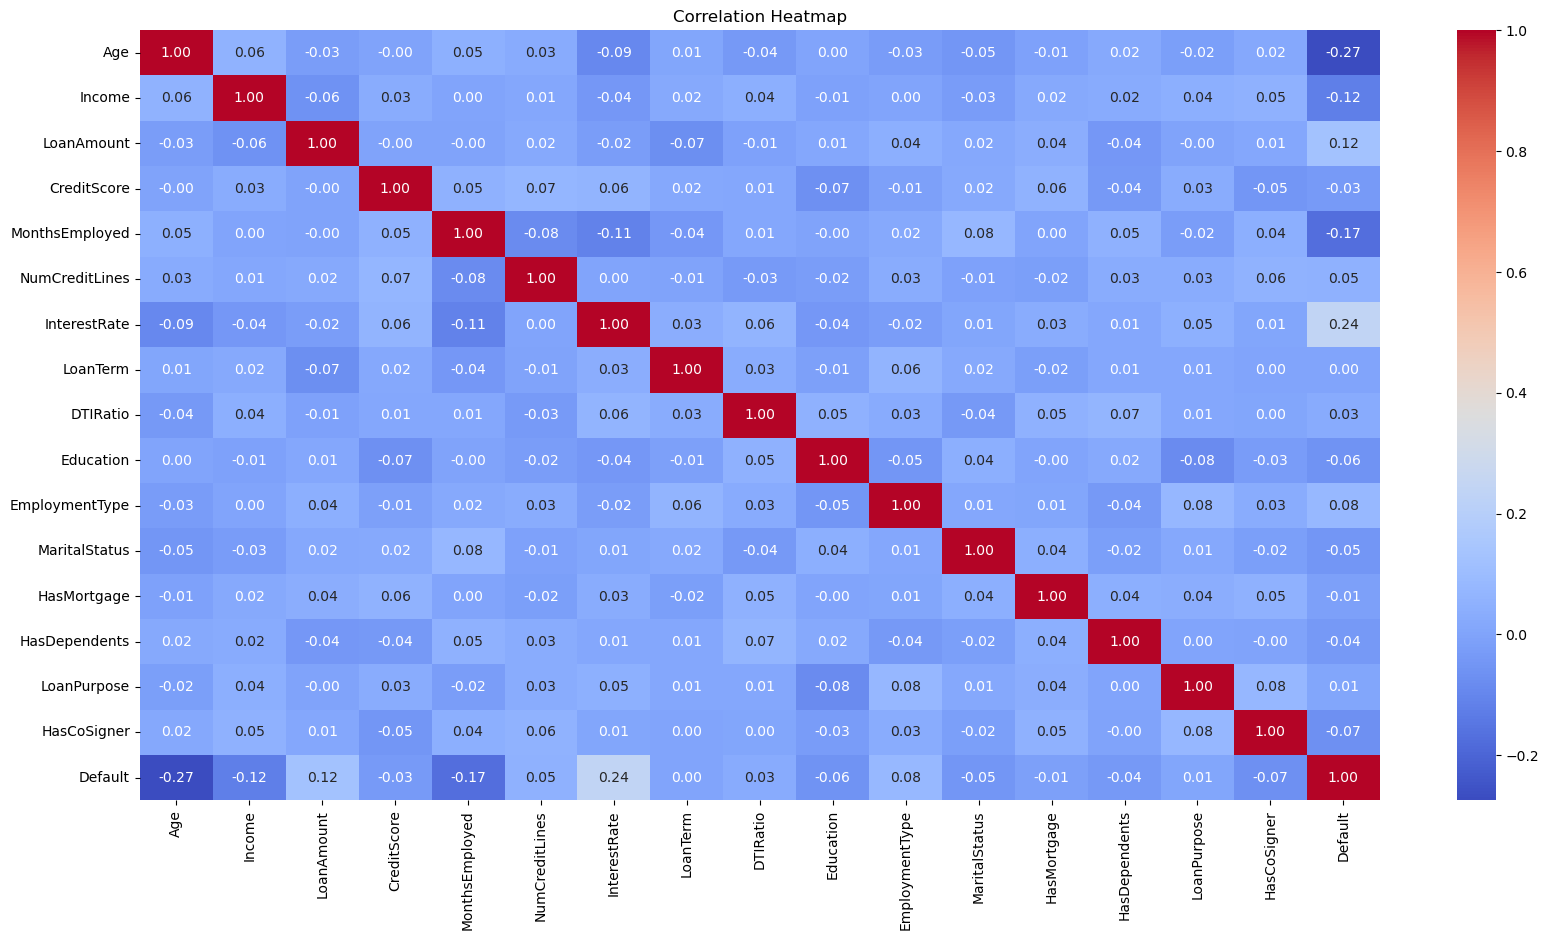

In [25]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="coolwarm",fmt='.2f')
plt.title("Correlation Heatmap")
plt.show();

# Preprocessing pipeline

In [26]:
preprocessor = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaler', StandardScaler())
])

# Define models & parameter grids for classification

In [27]:
models = {
    # -------------------------------
    "Logistic Regression": {
        "model": LogisticRegression(solver='lbfgs', max_iter=500, random_state=42),
        "param_grid": {
            "C": [0.1, 1, 10],
            "penalty": ['l2']
        }
    },
    # -------------------------------
    "Decision Tree": {
        "model": DecisionTreeClassifier(random_state=42),
        "param_grid": {
            "max_depth": [3, 5, 10, None],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4]
        }
    },
    # -------------------------------
    "Random Forest": {
        "model": RandomForestClassifier(random_state=42),
        "param_grid": {
            "n_estimators": [100, 200],
            "max_depth": [None, 10, 20],
            "min_samples_split": [2, 5],
            "min_samples_leaf": [1, 2]
        }
    },
    # -------------------------------
    "Gradient Boosting": {
        "model": GradientBoostingClassifier(random_state=42),
        "param_grid": {
            "n_estimators": [100, 200],
            "learning_rate": [0.01, 0.1, 0.2],
            "max_depth": [3, 5]
        }
    },
    # -------------------------------
    "AdaBoost": {
        "model": AdaBoostClassifier(random_state=42),
        "param_grid": {
            "n_estimators": [50, 100, 200],
            "learning_rate": [0.01, 0.1, 1.0]
        }
    },
    # -------------------------------
    "Extra Trees": {
        "model": ExtraTreesClassifier(random_state=42),
        "param_grid": {
            "n_estimators": [100, 200],
            "max_depth": [None, 10, 20],
            "min_samples_split": [2, 5],
            "min_samples_leaf": [1, 2]
        }
    },
    # -------------------------------
    "K-Nearest Neighbors": {
        "model": KNeighborsClassifier(),
        "param_grid": {
            "n_neighbors": [3, 5, 7, 9],
            "weights": ["uniform", "distance"],
            "p": [1, 2]  # Manhattan (L1) or Euclidean (L2)
        }
    },
    # -------------------------------
    "MLP Classifier": {
        "model": MLPClassifier(random_state=42),
        "param_grid": {
            "hidden_layer_sizes": [(50,), (100,)],
            "activation": ["relu", "tanh"],
            "solver": ["adam"],
            "max_iter": [200]
        }
    },
    # -------------------------------
    "XGBoost": {
        "model": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42),
        "param_grid": {
            "n_estimators": [100, 200],
            "max_depth": [3, 5, 7],
            "learning_rate": [0.01, 0.1, 0.2],
            "subsample": [0.8, 1.0],
            "colsample_bytree": [0.8, 1.0]
        }
    }
}

print(f" Total Models Loaded: {len(models)}")

 Total Models Loaded: 9


# Run GridSearchCV for each classification model

In [28]:
results = []
best_score = -float('inf')
best_model = None
best_name = None

# Run GridSearchCV for each classification model
for name, mp in models.items():
    print(f"\n Running GridSearchCV for {name}...")
    grid = GridSearchCV(mp['model'], param_grid=mp['param_grid'], cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)

    y_pred = grid.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    results.append({
        'Model': name,
        'Best Params': grid.best_params_,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1
    })

    print(f"{name} Best CV Score (Accuracy): {grid.best_score_:.4f}")
    print(f"{name} Best Params: {grid.best_params_}")
    print(f"{name} Classification Report:\n{classification_report(y_test, y_pred)}")


    if grid.best_score_ > best_score:
        best_score = grid.best_score_
        best_model = grid.best_estimator_
        best_name = name

# Output summary
results_df = pd.DataFrame(results)
print("\n Summary Results:")
print(results_df)

print(f"\n Best Model: {best_name}")
print(f" Best CV Score (Accuracy): {best_score:.4f}")


 Running GridSearchCV for Logistic Regression...
Logistic Regression Best CV Score (Accuracy): 0.6783
Logistic Regression Best Params: {'C': 10, 'penalty': 'l2'}
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.69      0.70       347
           1       0.71      0.73      0.72       364

    accuracy                           0.71       711
   macro avg       0.71      0.71      0.71       711
weighted avg       0.71      0.71      0.71       711


 Running GridSearchCV for Decision Tree...
Decision Tree Best CV Score (Accuracy): 0.9518
Decision Tree Best Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       347
           1       0.95      1.00      0.97       364

    accuracy                           0.97       711
   macro avg       0.97    

# Confusion Matrix

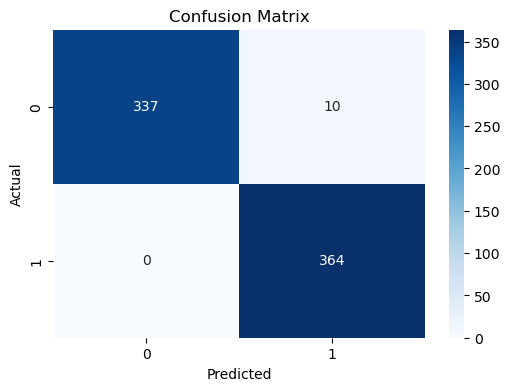

In [29]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Save the model

In [30]:
feature_columns = X.columns.to_list()
joblib.dump(feature_columns,'Loan Default Prediction.joblib')

['Loan Default Prediction.joblib']

In [31]:
joblib.dump(best_model,'bestmodel Loan Default Prediction.joblib')

['bestmodel Loan Default Prediction.joblib']